In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
df = pd.read_csv('C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\HDFCBANK.NS.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


In [36]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0
6566,2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976,1521.599976,5768339.0


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6.560000e+03
mean,337.150200,340.552696,333.371148,337.043588,328.143780,4.941709e+06
std,428.941250,432.701668,424.683662,428.705850,426.934669,5.711678e+06
min,2.435000,2.435000,2.395000,2.435000,1.975574,0.000000e+00
25%,23.799999,24.098750,23.309999,23.653751,20.443190,1.563008e+06
50%,134.424995,138.074997,130.504998,133.782501,122.550351,3.427885e+06
75%,513.462509,518.424988,509.062492,513.737488,495.121086,6.361122e+06
max,1705.000000,1725.000000,1671.000000,1688.699951,1688.699951,2.011300e+08


In [10]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999924,0.999914,0.999853,0.999753,0.237993
High,0.999924,1.000000,0.999874,0.999934,0.999840,0.241234
Low,0.999914,0.999874,1.000000,0.999919,0.999806,0.234104
Close,0.999853,0.999934,0.999919,1.000000,0.999892,0.237713
Adj Close,0.999753,0.999840,0.999806,0.999892,1.000000,0.236261
Volume,0.237993,0.241234,0.234104,0.237713,0.236261,1.000000


In [11]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [16]:
mode = df['Open'].mode()[0]
mode

22.5

In [18]:
df['Open'].fillna(mode, inplace=True)

In [19]:
mode = df['High'].mode()[0]
mode

23.200001

In [20]:
df['High'].fillna(mode, inplace=True)

In [21]:
mode = df['Low'].mode()[0]
mode

22.0

In [22]:
df['Low'].fillna(mode, inplace=True)

In [23]:
mode = df['Close'].mode()[0]
mode

3.805

In [24]:
df['Close'].fillna(mode, inplace=True)

In [25]:
mode = df['Adj Close'].mode()[0]
mode

3.087088

In [26]:
df['Adj Close'].fillna(mode, inplace=True)


In [32]:
mode = df['Volume'].mode()[0]
mode

0.0

In [33]:
df['Volume'].fillna(mode, inplace=True)

In [56]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

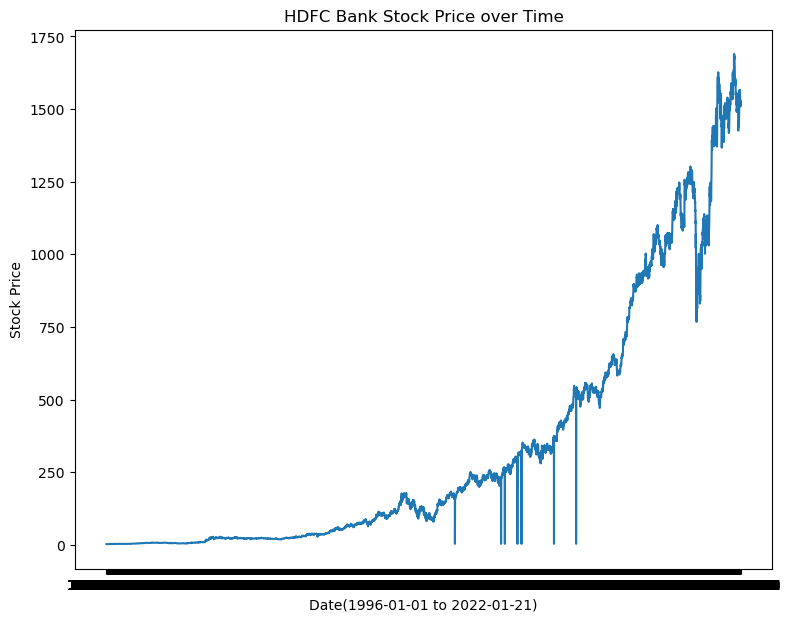

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date(1996-01-01 to 2022-01-21)')
plt.ylabel('Stock Price')
plt.title('HDFC Bank Stock Price over Time')
plt.show()


<AxesSubplot:>

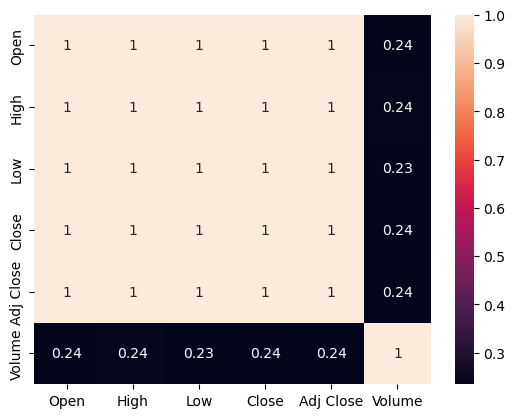

In [47]:
sns.heatmap(df.corr(), annot= True)

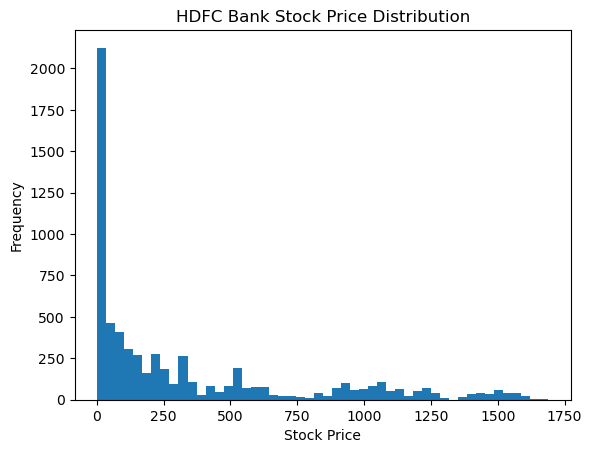

In [48]:
plt.hist(df['Close'], bins=50)
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.title('HDFC Bank Stock Price Distribution')
plt.show()


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999924  0.999914  0.999852   0.999753  0.238506
High       0.999924  1.000000  0.999874  0.999933   0.999839  0.241745
Low        0.999914  0.999874  1.000000  0.999918   0.999805  0.234619
Close      0.999852  0.999933  0.999918  1.000000   0.999892  0.238258
Adj Close  0.999753  0.999839  0.999805  0.999892   1.000000  0.236796
Volume     0.238506  0.241745  0.234619  0.238258   0.236796  1.000000


C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


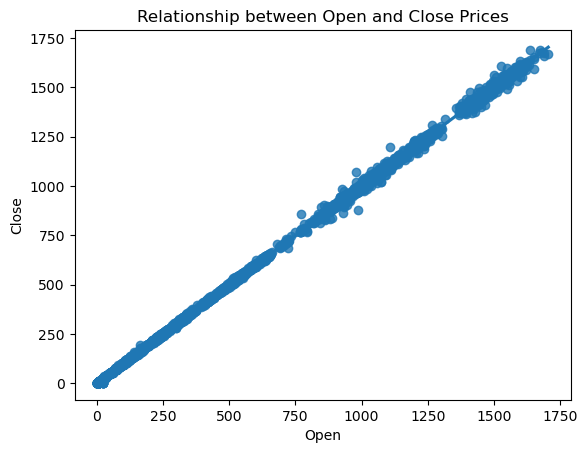

In [50]:
corr = df.corr()
print(corr)

sns.regplot(df['Open'], df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Relationship between Open and Close Prices')
plt.show()
